<a href="https://colab.research.google.com/github/Hinna0818/DL-self-practice/blob/main/pytorch/5autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 反向传播backward propagation 计算梯度，更新参数

In [1]:
import torch
x = torch.ones(5)
y = torch.zeros(3)
w = torch.randn(5, 3, requires_grad = True)
b = torch.randn(3, requires_grad = True)

## forward
z = torch.matmul(x, w) + b

## loss
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) ## 内部先对z进行sigmoid再计算loss
print(loss)

tensor(0.6672, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


## pytorch会在内部构建一个计算图，所有带requires_grad=True 的张量都被“记录”。当你调用 loss.backward()时，PyTorch 会自动计算所有参数的梯度

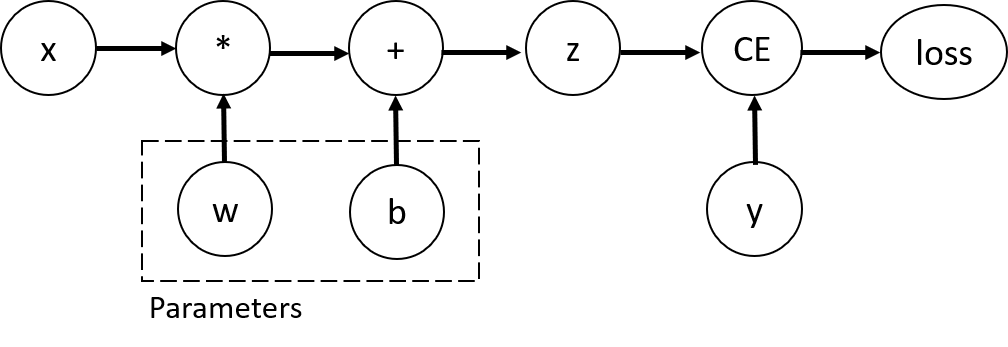

In [ ]:
## 带梯度可以这样写
# x.requires_grad_(True)

In [2]:
## grad_fn作为来源记录器，求当前参数是如何计算出来的，以及反向传播的方向
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x7eeedaddb5e0>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7eeedaddb430>


In [3]:
## 根据loss计算梯度
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0113, 0.2507, 0.1454],
        [0.0113, 0.2507, 0.1454],
        [0.0113, 0.2507, 0.1454],
        [0.0113, 0.2507, 0.1454],
        [0.0113, 0.2507, 0.1454]])
tensor([0.0113, 0.2507, 0.1454])


notes：
只有叶子节点的 .grad 属性可用。叶子节点是指：你自己创建的、不是通过其他张量计算出来的变量

.backward() 默认只能执行一次。想多次 .backward()，要加 retain_graph=True


In [4]:
## 冻结梯度（只需要输出，不需要训练模型）
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


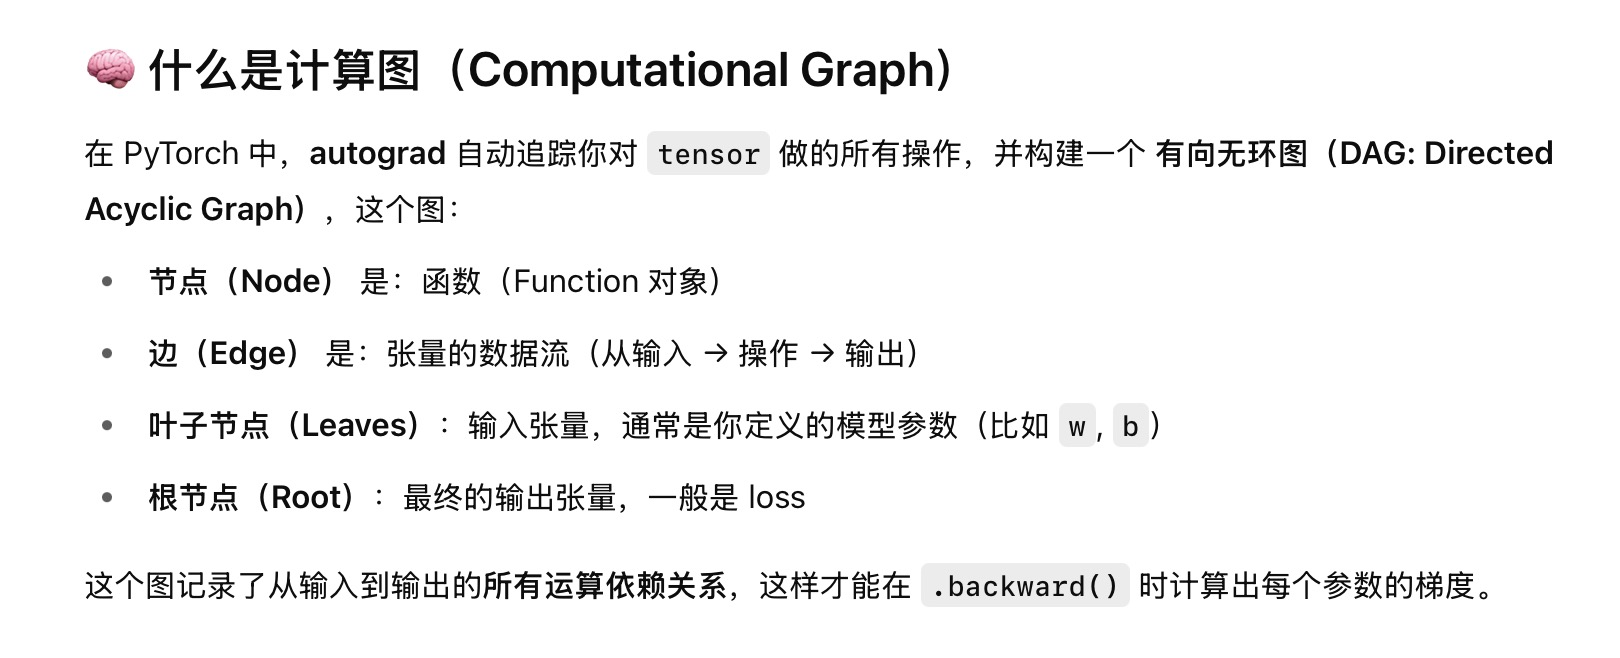